## Problem Set #[2]
MACS 30150, Dr. Evans    
Linghui Wu

### Problem 1

In [1]:
import sympy as sy
from matplotlib import pyplot as plt

x = sy.symbols("x")
f = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
f_prime = sy.diff(f, x)

# symbolic derivative of f w.r.t. x
f_prime

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [2]:
# lambdify f and f_prime
g = sy.lambdify(x, f)
g_prime = sy.lambdify(x, f_prime)

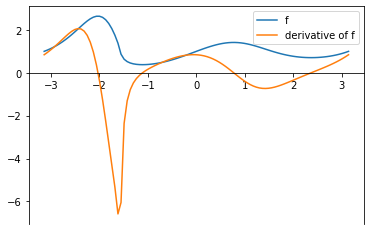

In [3]:
import numpy as np
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

x_val = np.linspace(-1 * np.pi, np.pi, 100)
plt.plot(x_val, g(x_val), label="f")
plt.plot(x_val, g_prime(x_val), label="derivative of f")
plt.legend()
plt.show()

### Problem 2

In [4]:
def forward_1(f, x_val, h=0.001):
    return [(f(x + h) - f(x)) / h for x in x_val]
def forward_2(f, x_val, h=0.001):
    return [(-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h) for x in x_val]
def backward_1(f, x_val, h=0.001):
    return [(f(x) - f(x - h)) / h for x in x_val]
def backward_2(f, x_val, h=0.001):
    return [(3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h) for x in x_val]
def centered_2(f, x_val, h=0.001):
    return [((f(x + h) - f(x - h)) / (2 * h)) for x in x_val]
def centered_4(f, x_val, h=0.001):
    return [(f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h) for x in x_val]

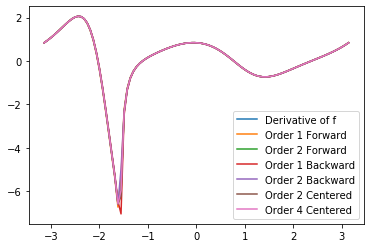

In [5]:
# plt.plot(x_val, g_prime(x_val), label="derivative of f")
h = 0.01  # a float adjusting the accuracy of the approximation

plt.plot(x_val, g_prime(x_val), label="Derivative of f")
plt.plot(x_val, forward_1(g, x_val, h), label="Order 1 Forward")
plt.plot(x_val, forward_2(g, x_val, h), label="Order 2 Forward")
plt.plot(x_val, backward_1(g, x_val, h), label="Order 1 Backward")
plt.plot(x_val, backward_2(g, x_val, h), label="Order 2 Backward")
plt.plot(x_val, centered_2(g, x_val, h), label="Order 2 Centered")
plt.plot(x_val, centered_4(g, x_val, h), label="Order 4 Centered")
plt.legend()
plt.show()

**It can be inferred from the plot that the six approximations produce very similar results with the symbolic differentiation.**

### Problem 3

In [6]:
def convergence(x):
    drv = g_prime(x)  # f'(x0)
    h_val = np.logspace(-8, 0, 9)
    
    plt.loglog(h_val, abs(np.array([forward_1(g, [x], h) for h in h_val]) - drv), label="Order 1 Forward", marker="o")
    plt.loglog(h_val, abs(np.array([forward_2(g, [x], h) for h in h_val]) - drv), label="Order 2 Forward", marker="o")
    plt.loglog(h_val, abs(np.array([backward_1(g, [x], h) for h in h_val]) - drv), label="Order 1 Backward", marker="o")
    plt.loglog(h_val, abs(np.array([backward_2(g, [x], h) for h in h_val]) - drv), label="Order 2 Backward", marker="o")
    plt.loglog(h_val, abs(np.array([centered_2(g, [x], h) for h in h_val]) - drv), label="Order 2 Centered", marker="o")
    plt.loglog(h_val, abs(np.array([centered_4(g, [x], h) for h in h_val]) - drv), label="Order 4 Centered", marker="o")
    
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.legend(loc="upper left")
    plt.show()

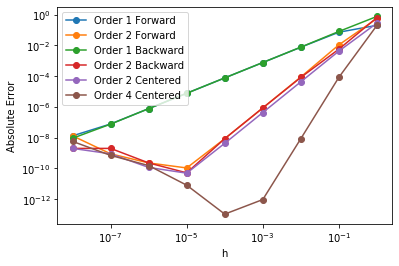

In [7]:
convergence(1)

### Problem 4

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Load the `.npy` file
df = np.load("plane.npy")
radar = pd.DataFrame(df, columns=["t", "alpha","beta"])

In [9]:
# convert degrees to radians
radar["alpha_rad"] = np.deg2rad(radar["alpha"])
radar["beta_rad"] = np.deg2rad(radar["beta"])

# compute the coordinates x(t) and y(t)
a = 500
radar["x(t)"] = a * np.tan(radar["beta_rad"]) / (np.tan(radar["beta_rad"]) - np.tan(radar["alpha_rad"]))
radar["y(t)"] = a * (np.tan(radar["beta_rad"]) * np.tan(radar["alpha_rad"])) \
                / (np.tan(radar["beta_rad"]) - np.tan(radar["alpha_rad"]))

In [10]:
# approximating x'(t) and y'(t)
radar["x'(t)"] = 0.0
radar["x'(t)"][0] = radar["x(t)"][1] - radar["x(t)"][0]
radar["x'(t)"][7] = radar["x(t)"][7] - radar["x(t)"][6]
for i in range(1, 7):
    radar["x'(t)"][i] = 0.5 * (radar["x(t)"][i + 1] - radar["x(t)"][i - 1])
    
radar["y'(t)"] = 0.0
radar["y'(t)"][0] = radar["y(t)"][1] - radar["y(t)"][0]
radar["y'(t)"][7] = radar["y(t)"][7] - radar["y(t)"][6]
for i in range(1, 7):
    radar["y'(t)"][i] = (radar["y(t)"][i + 1] - radar["y(t)"][i - 1]) / 2
radar

,t,alpha,beta,alpha_rad,beta_rad,x(t),y(t),x'(t),y'(t)
0,7.0,56.25,67.54,0.981748,1.178795,1311.271337,1962.456239,44.665140,12.658266
1,8.0,55.53,66.57,0.969181,1.161866,1355.936476,1975.114505,45.323531,12.444889
2,9.0,54.80,65.59,0.956440,1.144761,1401.918398,1987.346016,47.280265,12.863104
3,10.0,54.06,64.59,0.943525,1.127308,1450.497006,2000.840713,48.360976,13.083197
4,11.0,53.34,63.62,0.930959,1.110378,1498.640350,2013.512411,46.650974,12.475760
5,12.0,52.69,62.74,0.919614,1.095020,1543.798955,2025.792234,49.700516,13.739086
6,13.0,51.94,61.72,0.906524,1.077217,1598.041382,2040.990583,51.898569,14.636669
7,14.0,51.28,60.82,0.895005,1.061509,1647.596093,2055.065571,49.554711,14.074988


In [11]:
# returning the value of the speed
radar["speed"] = np.sqrt(radar["x'(t)"] ** 2 + radar["y'(t)"] ** 2).round(2)
radar[["t", "speed"]]

,t,speed
0,7.0,46.42
1,8.0,47.00
2,9.0,49.00
3,10.0,50.10
4,11.0,48.29
5,12.0,51.56
6,13.0,53.92
7,14.0,51.51


### Problem 5

In [12]:
def jacobian(f, x0, h):
    jacob = np.zeros((len(f), len(x0)))
    
    variables = set()
    for fi in f:
        variables = variables.union(fi.atoms(sy.Symbol))

    for i, fi in enumerate(f):
        for j, v in enumerate(variables):
            run_fi = sy.simplify((fi.subs(v, v + h) - fi.subs(v, v - h)) / (2 * h))
            fi_prime = sy.lambdify(v, run_fi, "numpy")
            jacob[i, j] = fi_prime(x0[j])
    return jacob

In [13]:
x = sy.symbols('x')
y = sy.symbols('y')
func_1 = x ** 2
func_2 = x ** 3 - y
jacobian([func_1, func_2], [1, 1], 0.0001)

array([[ 0.        ,  2.        ],
       [-1.        ,  3.00000001]])

**The results calculated using SymPy is the same as my own scratch work.**

### Problem 7

In [14]:
from autograd import numpy as anp
from autograd import grad
import time

In [15]:
def timer(N):
    timer_1 = np.zeros(N, dtype="float")
    timer_2 = np.zeros(N, dtype="float")
    timer_3 = np.zeros(N, dtype="float")
    
    error_1 = 1e-18 * np.ones(N, dtype="float")
    error_2 = np.zeros(N, dtype="float")
    error_3 = np.zeros(N, dtype="float")
    
    x = sy.symbols("x")
    f = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
    f_lmbd = sy.lambdify(x, f)
    
    g = lambda x: (anp.sin(x) + 1) ** anp.sin(anp.cos(x))
    dg = grad(g)
    
    for i in range(N):
        # choose a random value x0
        x0 = np.random.uniform(-np.pi, np.pi)
        
        # symbolic
        timer_1_1 = time.clock()
        f_prime = sy.diff(f)
        f_prime_lmbd = sy.lambdify(x, f_prime)
        result_1 = f_prime_lmbd(x0)
        timer_1_2 = time.clock()
        timer_1[i] = timer_1_2 - timer_1_1
        
        # numerical
        timer_2_1 = time.clock()
        result_2 = centered_4(f_lmbd, [x0])
        timer_2_2 = time.clock()
        timer_2[i] = timer_2_2 - timer_2_1
        error_2[i] = abs(result_2 - result_1)
        
        # autograd
        timer_3_1 = time.clock()
        result_3 = dg(x0)
        timer_3_2 = time.clock()
        timer_3[i] = timer_3_2 - timer_3_1
        error_3[i] = abs(result_3 - result_1)
        
    # plot the figure
    plt.figure(figsize=(8, 5))
    plt.loglog(timer_1, error_1, "bo", label="SymPy")
    plt.loglog(timer_2, error_2, "yo", label="Difference Quotients")
    plt.loglog(timer_3, error_3, "go", label="Autograd")
    plt.legend(loc="upper right")
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.show()

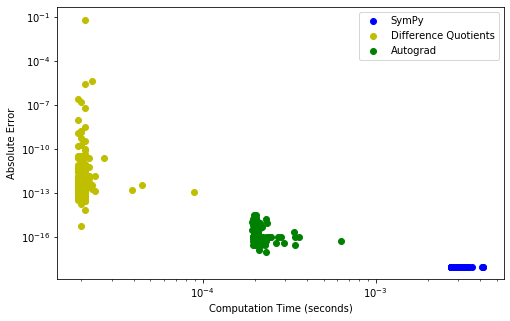

In [16]:
timer(200)